# Projet Intelligence Artificielle

Neil Desplats - Arthur Pinto Rosa - Hadrien Eyraud


Ce rapport est également disponible au [format `ipynb`](https://raw.githubusercontent.com/imneedle/projet-ia/main/report/rapport.ipynb), sur notre [dépôt git](https://github.com/imneedle/projet-ia). Il contient le code et l'infrastructure permettant de regénérer la connaissance. Il est nécessaire d'exécuter le dernier bloc de code depuis le dépôt, car il utilise notre arborescence de scripts python (il est nécessaire d'avoir Python 3.11)

# Prediction de la qualité de l'air à Grenoble

## Présentation du problème

La pollution de l'air représente un défi majeur dans de nombreuses villes à travers le monde, Grenoble étant un exemple illustratif. Bien que divers indicateurs soient utilisés pour évaluer la qualité de l'air, les modèles actuels ne couvrent souvent qu'un seul aspect, tel que les particules fines, les oxydes d'azote, l'ozone, ou le monoxyde de carbone. Cette étude s'appuie sur l'article suivant : https://www.sciencedirect.com/science/article/abs/pii/S1352231010003821

### Pourquoi l'Intelligence Artificielle est Indispensable

L'utilisation de l'intelligence artificielle se justifie par la complexité inhérente à la prédiction de la qualité de l'air, qui ne peut être pleinement appréhendée par une simple approche statistique. Voici quelques raisons majeures :

#### Relations Non Linéaires

Les relations entre les différents indicateurs de qualité de l'air, les conditions météorologiques et les caractéristiques urbaines sont souvent non linéaires et complexes. L'IA est capable de capturer ces relations subtiles, là où les modèles statistiques classiques pourraient échouer.

#### Adaptabilité Dynamique

La qualité de l'air évolue de manière dynamique en fonction de divers facteurs. L'IA peut s'adapter et apprendre des modèles évolutifs, permettant ainsi une meilleure anticipation des changements rapides, contrairement à des modèles statistiques qui pourraient manquer de flexibilité.

#### Gestion de Données Hétérogènes

Les données sur la qualité de l'air, les prévisions météorologiques et les caractéristiques urbaines peuvent être hétérogènes et volumineuses. L'IA excelle dans la gestion et l'analyse de ces données complexes, fournissant ainsi une vision intégrée.

#### Facteurs Cachés

Certains facteurs influençant la qualité de l'air peuvent être cachés ou difficilement détectables par des approches statistiques traditionnelles. L'IA peut identifier des schémas subtils et des corrélations non évidentes, améliorant ainsi la précision des prédictions.

### Objectif du Projet

Nous souhaitons développer une solution  basée sur l'intelligence artificielle pour prédire la qualité de l'air à court terme dans la ville de Grenoble. En combinant la puissance de l'IA avec des données météorologiques et de pollution, nous visons à créer un modèle adaptable et holistique, allant au-delà des limites des approches statistiques conventionnelles.

## Jeu de données

### Données Météorologiques

Nous avons exploité les données de l'API OpenWeatherMap pour recueillir des informations météorologiques détaillées sur Grenoble. Ces données comprennent des paramètres tels que l'humidité, le point de rosée, la température moyenne, la vitesse et la direction du vent, etc. Cette approche nous a permis de constituer un ensemble de données riche et diversifié, couvrant une période étendue de plus d'un an et demi. La qualité de ces données météorologiques est cruciale pour établir des relations significatives entre les conditions météorologiques et la qualité de l'air.

### Données de Qualité de l'Air

Les données sur la qualité de l'air, essentielles à notre modèle, ont été obtenues à partir de l'API OpenMétéo. Ces données comprennent une variété de polluants atmosphériques tels que les particules fines, le monoxyde de carbone, le monoxyde d'azote, et d'autres. Nous avons récupéré des informations détaillées spécifiquement pour Grenoble sur une période similaire, soit plus d'un an et demi. Cette approche nous offre une vision complète de la pollution atmosphérique, permettant une modélisation robuste prenant en compte plusieurs polluants.

### Expérience Antérieure Réussie

Une expérience préliminaire menée à Louisville a montré des résultats prometteurs en utilisant les données météorologiques et les particules fines 24 heures en amont du vent. Forts de ces résultats positifs, nous étendons désormais notre approche pour inclure d'autres polluants et enrichir davantage notre ensemble de données. Cette expansion vise à renforcer la capacité de notre modèle à anticiper la qualité de l'air dans diverses conditions atmosphériques et environnementales.

### Objectif d'Entraînement du Modèle

L'ensemble de données ainsi constitué, couvrant une période significative et incluant une diversité de paramètres, servira à entraîner notre modèle d'intelligence artificielle. L'objectif est de permettre à notre modèle de comprendre les relations complexes entre les différentes variables météorologiques, les caractéristiques urbaines et les niveaux de pollution, afin de réaliser des prédictions précises et adaptées à Grenoble, et éventuellement, à d'autres villes.


## Génération des Connaissances

### Utilisation d'APIs Publiques

Notre approche repose sur l'utilisation de deux APIs publiques, OpenWeatherMap et OpenMétéo, pour collecter des données météorologiques et de qualité de l'air spécifiques à Grenoble. Cependant, en raison des restrictions quant au nombre d'appels quotidiens autorisés par ces APIs, nous avons dû élaborer une stratégie intelligente pour récupérer un jeu de données étendu sur la dernière année et demi.

### Stratégie de Récupération de Données

En raison des limitations de fréquence d'appels, nous avons mis en place un processus de récupération de données qui s'adapte aux contraintes imposées par les APIs. Plutôt que de chercher à récupérer toutes les données en une seule fois, nous avons opté pour des requêtes quotidiennes, travaillant avec la contrainte de nombre d'appels par jour.

### Automatisation avec Crontab

Pour implémenter notre stratégie de récupération, nous avons utilisé la planification de tâches à l'aide de la crontab. Un script de récupération de données a été configuré pour s'exécuter automatiquement à des intervalles réguliers, relançant le processus de collecte de données chaque jour. Cette approche nous a permis de rester dans les limites de requêtes autorisées tout en accumulant progressivement un jeu de données complet sur une période étendue.

### Agrégation des Données

À chaque exécution du script, les nouvelles données récupérées quotidiennement ont été ajoutées à notre ensemble de données principal. Cela a conduit à une accumulation graduelle et régulière de données météorologiques et de qualité de l'air sur plus de 500 jours. Cette méthode nous a permis de contourner les limitations tout en garantissant une couverture temporelle significative pour l'entraînement de notre modèle.

### Avantages de l'Approche

1. **Respect des Limites :** En respectant les limites d'appels quotidiens, nous avons assuré une utilisation éthique et conforme des APIs publiques.
   
2. **Intégration Continue :** L'automatisation du processus avec la crontab a facilité une intégration continue des nouvelles données dans notre ensemble existant, garantissant une mise à jour régulière et une couverture temporelle étendue.

3. **Évolutivité :** Cette méthode évolutive nous a permis de construire un ensemble de données robuste sur une période prolongée, crucial pour l'entraînement efficace de notre modèle prédictif.

### Conclusion pour récupération des connaissances générées

La combinaison de l'automatisation, de la planification régulière des tâches et de la gestion intelligente des quotas d'API a été essentielle pour générer un jeu de données significatif et fiable, posant ainsi les bases d'une modélisation précise de la qualité de l'air à Grenoble.

En raison de cette approche, il n'est pas possible de fournir directement un script pour récupérer les connaissances accumulées sur plus de 500 jours en raison des contraintes d'API. Cependant, nous mettons à disposition le [jeu de données résultant au format CSV](https://github.com/imneedle/projet-ia/tree/main/data/training.csv). Nous offrons également la présentation de notre [script de récupération](https://github.com/imneedle/projet-ia/blob/main/src/api/local_data.py), illustrant le processus suivi pour générer cette base de connaissances étendue.

## Recherche du meilleur modèle

Pour déterminer le meilleur modèle pour notre projet, nous avons effectué une revue de littérature sur divers algorithmes d'apprentissage automatique utilisés pour la prédiction de la qualité de l'air.

L'un des avantages de KNN est sa simplicité et sa facilité de mise en œuvre. C'est un algorithme non paramétrique qui ne fait aucune hypothèse sur la distribution sous-jacente des données. Au lieu de cela, il s'appuie sur la proximité des points de données pour faire des prédictions. Cela rend KNN adapté pour capturer des relations complexes et non linéaires entre les indicateurs de qualité de l'air et les variables météorologiques.

De plus, KNN est un algorithme polyvalent qui peut gérer à la fois les tâches de régression et de classification. Dans notre cas, nous sommes intéressés par la prédiction de l'indice de qualité de l'air (AQI), qui est une variable continue. KNN peut être facilement adapté aux tâches de régression en moyennant les valeurs des k plus proches voisins.

Ces avantages ont également étés présentés par Pochai et al. (2023), qui ont publié des travaux sur la prédiction des niveaux de PM2.5 grâce à KNN pendant que nous commencions ces travaux.

Sur la base de cette revue de littérature et de l'adéquation de KNN pour notre tâche de régression, nous avons décidé d'explorer ses performances dans notre projet. Cependant, il est important de noter que le choix du meilleur modèle dépend finalement des caractéristiques spécifiques de l'ensemble de données et du problème en question. Par conséquent, nous comparerons les performances de KNN avec d'autres algorithmes d'apprentissage automatique pour déterminer le meilleur modèle pour notre tâche de prédiction de la qualité de l'air.

In [1]:
import sys
import os
from datetime import datetime
sys.path.append(os.path.join(os.path.abspath('../')))

import requests
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt


from src.api.api import Api
from src.api.pollution_api import PollutionApi
from src.api.future_pollution import FuturePollutionApi
from src.api.predicted_weather import PredictedWeatherApi
from src.util.position_offsetter import PositionOffsetter

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

In [2]:
data = pd.read_csv('../data/training.csv')

data.drop(columns=['time'], inplace=True)

train_df, test_df = train_test_split(data, test_size=0.3)

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.reset_index(drop=True)
train_df.drop(columns=['co','no','no2','o3','so2','pm2_5','pm10','nh3'], inplace=True)
test_df = test_df.reset_index(drop=True)
test_df.drop(columns=['co','no','no2','o3','so2','pm2_5','pm10','nh3'], inplace=True)

stats={}

In [3]:
n_neighbors = range(1, 16)

maes = []
rmses = []
training_times = []
prediction_times = []

for k in n_neighbors:

    start_time = time.time()

    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()    
    predictions = knn_model.predict(test_df.drop(columns=['aqi']))
    end_time = time.time()
    prediction_time = end_time - start_time
    
    maes.append(np.mean(np.abs(predictions - test_df['aqi'])))
    rmses.append(np.sqrt(np.mean((predictions - test_df['aqi'])**2)))
    training_times.append(training_time)
    prediction_times.append(prediction_time)


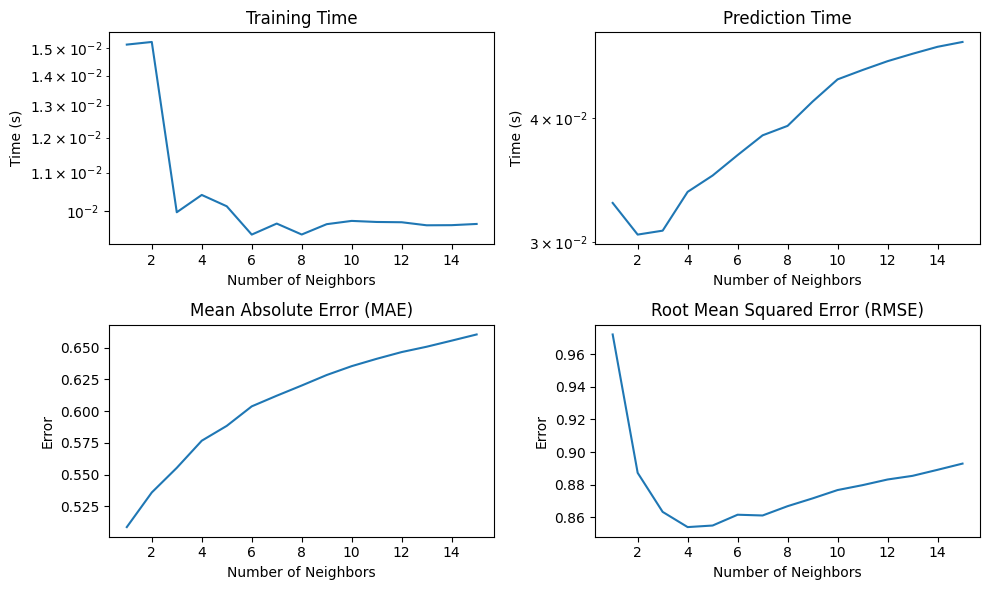

In [4]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(n_neighbors, training_times)
plt.title('Training Time')
plt.xlabel('Number of Neighbors')
plt.ylabel('Time (s)')
plt.yscale('log')

plt.subplot(2, 2, 2)
plt.plot(n_neighbors, prediction_times)
plt.title('Prediction Time')
plt.xlabel('Number of Neighbors')
plt.ylabel('Time (s)')
plt.yscale('log')

plt.subplot(2, 2, 3)
plt.plot(n_neighbors, maes)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')

plt.subplot(2, 2, 4)
plt.plot(n_neighbors, rmses)
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')

plt.tight_layout()
plt.show()


### Comparaison avec d'autres modèles

Nous avons constaté que le meilleur choix pour le nombre de voisins est aux alentours de 4 ou 5. Nous avons donc pris la décision d'utiliser 4 voisins.

Afin de vérifier que ce modèle permet une bonne précision, nous comparerons KNN à d'autres modèles qui nous semblaient appropriés pour cette tâche : 
- Random Forest
- Gradient Boosting
- AdaBoost
- Multi-layer Perceptron

Nous avons aussi séléctionné deux modèles qui nous semblaient moins adapté, pour vérifier si les autres algorithmes étaient effectivement meilleurs :
- Gaussian Naive Bayes
- Perceptron

Les scripts suivants montrent nos efforts de recherche.


In [5]:
start_time = time.time()

knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()

training_time = end_time - start_time

start_time = time.time()

predictions = knn_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()

prediction_time = end_time - start_time

model = "KNeighborsRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [6]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'KNeighborsRegressor'
training_time = 0.010763168334960938
prediction_time = 0.032384395599365234
Mean Absolute Error (MAE): 0.5767030681227249
Root Mean Squared Error (RMSE): 0.8540838239699513
Coefficient of Determination (R-squared): 0.531731837669339
Mean Absolute Percentage Error (MAPE): 31.95484486046108
      Expected Value  Predicted Value
803              1.0             1.00
1855             2.0             2.25
306              1.0             1.25
521              4.0             4.00
3314             2.0             1.50
3608             1.0             1.00
3756             4.0             4.00
2929             5.0             4.25
1769             1.0             1.25
2654             1.0             1.75
1874             5.0             4.75
1585             4.0             2.25
3667             5.0             4.25
3083             2.0             2.00
274              2.0             1.25


In [7]:
start_time = time.time()

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
predictions = rf_model.predict(test_df.drop(columns=['aqi']))
end_time = time.time()
prediction_time = end_time - start_time

model = "RandomForestRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [8]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'RandomForestRegressor'
training_time = 4.232816934585571
prediction_time = 0.034395694732666016
Mean Absolute Error (MAE): 0.5015834633385335
Root Mean Squared Error (RMSE): 0.6949664690729513
Coefficient of Determination (R-squared): 0.6899574214621036
Mean Absolute Percentage Error (MAPE): 29.323730282544634
      Expected Value  Predicted Value
3355             1.0             1.59
1974             2.0             1.60
2634             2.0             2.54
2834             1.0             1.14
1903             5.0             2.87
3248             4.0             3.79
1975             1.0             1.27
3816             1.0             1.41
72               1.0             1.61
2556             4.0             3.30
3224             1.0             2.32
397              2.0             1.91
1384             2.0             1.90
3568             3.0             2.26
2484             1.0             3.17


In [9]:
start_time = time.time()

gb_model = GradientBoostingRegressor()
gb_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = gb_model.predict(test_df.drop(columns=['aqi']))
end_time = time.time()
prediction_time = end_time - start_time

model = "GradientBoostingRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [10]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'GradientBoostingRegressor'
training_time = 1.5445277690887451
prediction_time = 0.005072116851806641
Mean Absolute Error (MAE): 0.6217785358288687
Root Mean Squared Error (RMSE): 0.8344592382989627
Coefficient of Determination (R-squared): 0.5530037372915142
Mean Absolute Percentage Error (MAPE): 35.83119589069169
      Expected Value  Predicted Value
3394             1.0         1.646636
2003             1.0         1.378946
1884             2.0         1.678616
3380             5.0         4.943965
1665             1.0         0.954536
3568             3.0         2.307985
578              5.0         4.645212
2894             2.0         1.625705
3263             1.0         1.335174
2180             1.0         1.808710
122              2.0         2.021396
2473             2.0         2.203210
641              4.0         2.449726
3777             5.0         3.667945
1796             1.0         0.980384


In [11]:
start_time = time.time()

ada_model = AdaBoostRegressor()
ada_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = ada_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "AdaBoostRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [12]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'AdaBoostRegressor'
training_time = 0.2224597930908203
prediction_time = 0.003979206085205078
Mean Absolute Error (MAE): 0.8236807029890882
Root Mean Squared Error (RMSE): 0.9768625592620572
Coefficient of Determination (R-squared): 0.38742316897955187
Mean Absolute Percentage Error (MAPE): 53.8157122847057
      Expected Value  Predicted Value
1648             1.0         1.665667
1771             3.0         2.034803
1637             1.0         1.873112
2263             2.0         1.665667
3552             2.0         2.835863
3358             1.0         2.158232
407              1.0         2.158232
1317             1.0         2.197927
2992             1.0         1.611839
1017             4.0         2.158232
1153             4.0         2.272751
3137             1.0         1.881381
2093             1.0         1.741801
2852             1.0         1.829401
1586             2.0         1.665667


In [13]:
start_time = time.time()

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = mlp_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "MLPRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [14]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'MLPRegressor'
training_time = 3.420048475265503
prediction_time = 0.005161285400390625
Mean Absolute Error (MAE): 0.679268109808923
Root Mean Squared Error (RMSE): 0.9072766895525204
Coefficient of Determination (R-squared): 0.47158742600389814
Mean Absolute Percentage Error (MAPE): 37.239545310973334
      Expected Value  Predicted Value
988              2.0         1.412636
2916             1.0         1.382221
3405             2.0         2.900243
2629             1.0         1.858044
697              1.0         1.408826
2465             1.0         1.069855
3514             1.0         1.316879
3599             4.0         3.320827
1082             1.0         0.998353
2283             2.0         2.186891
3182             2.0         1.136909
2081             2.0         2.170287
1922             2.0         1.714701
2206             1.0         1.063017
205              1.0         0.596193


In [15]:
start_time = time.time()

nb_model = GaussianNB()
nb_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = nb_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "GaussianNB"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [16]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'GaussianNB'
training_time = 0.005426645278930664
prediction_time = 0.004407167434692383
Mean Absolute Error (MAE): 0.7930317212688508
Root Mean Squared Error (RMSE): 1.2980244199150446
Coefficient of Determination (R-squared): -0.08158178289170692
Mean Absolute Percentage Error (MAPE): 34.83099323972959
      Expected Value  Predicted Value
1435             5.0              1.0
1916             1.0              2.0
2                1.0              1.0
612              2.0              4.0
660              5.0              5.0
892              2.0              1.0
3691             1.0              1.0
539              2.0              1.0
2672             2.0              5.0
2450             2.0              2.0
3526             1.0              1.0
1432             2.0              2.0
1676             1.0              1.0
3183             1.0              1.0
1151             3.0              5.0


In [17]:
start_time = time.time()

perceptron_model = Perceptron()
perceptron_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = perceptron_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "Perceptron"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [18]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'Perceptron'
training_time = 0.038717031478881836
prediction_time = 0.0014452934265136719
Mean Absolute Error (MAE): 0.7285491419656787
Root Mean Squared Error (RMSE): 1.1481518758897729
Coefficient of Determination (R-squared): 0.15376240134861818
Mean Absolute Percentage Error (MAPE): 35.869301438724214
      Expected Value  Predicted Value
948              2.0              1.0
2701             4.0              2.0
361              1.0              2.0
3062             4.0              4.0
2716             4.0              2.0
2684             1.0              1.0
2167             5.0              5.0
2812             3.0              2.0
1184             2.0              1.0
437              2.0              1.0
1807             3.0              2.0
1909             4.0              4.0
990              2.0              2.0
2990             3.0              2.0
3360             5.0              2.0


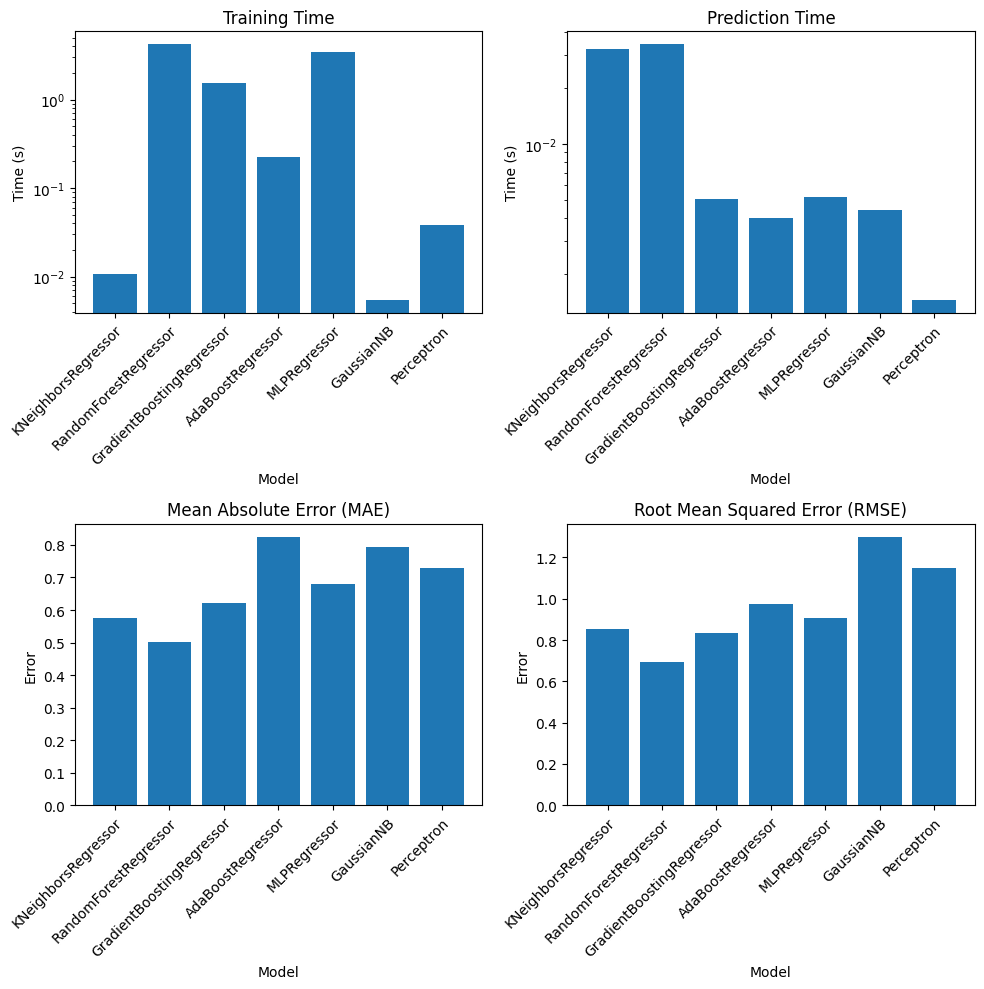

In [19]:
models = list(stats.keys())
training_times = [stats[model]['training_time'] for model in models]
prediction_times = [stats[model]['prediction_time'] for model in models]
maes = [stats[model]['mae'] for model in models]
rmses = [stats[model]['rmse'] for model in models]
r_squareds = [stats[model]['r_squared'] for model in models]
mapes = [stats[model]['mape'] for model in models]

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.bar(models, training_times)
plt.title('Training Time')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 2)
plt.bar(models, prediction_times)
plt.title('Prediction Time')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 3)
plt.bar(models, maes)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 4)
plt.bar(models, rmses)
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()


### Discussion sur la qualité des modèles évalués

Nous constatons que les modèles que nous avons choisis pour leur qualité sont effectivement meilleurs que les autres. KNN fournit des résultats plutôt précis en comparaison aux autres modèles, mais ce n'est pas le meilleur. Random Forest et Gradient Boosting sont légèrement meilleurs.

L'erreur est acceptable pour donner une indication de la pollution de l'air, mais n'est pas assez précise pour des domaines ou cela serait important.

## Évaluation des aspects environnementaux et sociétaux

Nous avons réalisé des mesures significatives de l'impact environnemental de notre projet d'intelligence artificielle en utilisant la bibliothèque Python CarbonTracker. Ces mesures ont été effectuées tant pendant la phase d'entraînement du modèle que lors de la phase de prédiction. Les résultats, présentés dans le tableau ci-dessous, sont exprimés en termes d'équivalent en mètres parcourus en voiture, une unité couramment utilisée pour quantifier les émissions de carbone. Les autres chiffres indiqués correspondent aux grammes de CO2 produits lors du fonctionnement. Le calcul de l'équivalent CO2 utilise la valeur de 58.48 gCO2/kWh, qui correspond à l'intensité moyenne à Grenoble en 2021. On admet que le modèle sera beaucoup moins entraîné qu'il ne fera de prédictions (d'où le facteur 1000 entre les 2). La machine de test est dotée d'un processeur AMD Ryzen 7 à 8 cœurs.

|    Modèle              | Entrainement (x10) | Equivalent en mètres parcourus en voiture | Prédiction (x 10000) | Equivalent en mètres parcourus en voiture |
|:------------------------:|:--------------------:|:-------------------------------------------:|:----------------------:|:-------------------------------------------:|
| KNN                    | ~0                 | ~0                                        | 0.442                | 4.11                                      |
| Random Forest          | 0.0411             | 0.383                                     | 0.222                | 2.07                                      |
| Gradient Boost         | 0.0466             | 0.434                                     | 0.100                | 0.930                                     |
| Ada Boost              | 0.00978            | 0.0910                                    | 0.173                | 1.61                                      |
| Multi-layer Perceptron | 0.0402             | 0.374                                     | 0.325                | 3.02                                      |
| Gaussian               | 0.000135           | 0.00125                                   | 0.101                | 0.942                                     |
| Perceptron             | 0.000684           | 0.00637                                   | ~0                   | ~0                                        |

### Analyse de l'Impact Environnemental

#### Entraînement du Modèle

Les modèles KNN, Gaussian et Perceptron présentent des impacts environnementaux minimes lors de la phase d'entraînement, s'approchant de zéro équivalent en mètres parcourus en voiture.
Les modèles Random Forest, Gradient Boost, et Multi-layer Perceptron présentent des impacts plus significatifs. 

#### Prédiction avec le Modèle

Le modèle KNN affiche un impact de prédiction plus élevé par rapport à son entraînement, avec un équivalent en mètres parcourus en voiture de 4.11.
Le modèle Perceptron montre la plus grande efficacité environnementale lors de la phase de prédiction, avec un impact minimal approximé à 0.

#### Choix du Modèle en Termes d'Impact Environnemental

En considérant l'ensemble des modèles, le Perceptron se distingue par son impact environnemental relativement bas, tant pendant l'entraînement que la prédiction.
Cependant, il est essentiel de noter que le choix du modèle optimal ne doit pas se faire uniquement sur la base de l'impact environnemental, mais également en prenant en compte la précision et la performance du modèle dans la résolution du problème spécifique de qualité de l'air. Ainsi, il est recommandé de trouver un équilibre entre l'efficacité environnementale et les performances du modèle. En tenant compte de ces 2 critères, le perceptron, qui à des prédictions trop biaisées par rapport à la réalité ne peut-être sélectionné.

### Impact Sociétal du Projet

Notre projet d'intelligence artificielle visant à prédire la qualité de l'air présente également des implications sociétales qui méritent d'être évaluées. Voici une analyse de l'impact potentiel de notre projet sur la société :

#### Amélioration de la Santé Publique

En anticipant la qualité de l'air, notre modèle offre la possibilité aux autorités locales et aux résidents de prendre des mesures préventives en cas de niveaux de pollution élevés. Cela peut contribuer à réduire les risques sanitaires associés à la pollution de l'air, améliorant ainsi la santé globale de la population.

#### Urbanisme Durable

Les données météorologiques et de qualité de l'air collectées peuvent être utilisées pour orienter les décisions d'urbanisme vers des solutions plus durables et respectueuses de l'environnement. Cela pourrait avoir un impact positif sur la planification urbaine en favorisant des politiques et des infrastructures qui réduisent la pollution atmosphérique.

#### Sensibilisation à la Pollution de l'Air

Notre projet peut contribuer à sensibiliser la population à la problématique de la pollution de l'air en fournissant des informations prédictives accessibles. Une meilleure compréhension des enjeux environnementaux peut conduire à des comportements individuels plus responsables et à des initiatives collectives en faveur de la qualité de l'air.

#### Prise de Décision Informée

Les données générées par notre modèle peuvent être utilisées par les autorités locales pour prendre des décisions informées en matière de gestion de la qualité de l'air. Cela inclut la mise en œuvre de mesures d'urgence, la planification de la circulation, et d'autres initiatives visant à réduire l'impact de la pollution atmosphérique.

#### Accessibilité aux Données Environnementales

En fournissant des données prédictives sur la qualité de l'air, notre projet contribue à rendre les informations environnementales plus accessibles au grand public. Cela renforce la transparence et l'engagement de la communauté dans les questions liées à l'environnement.

## Prédiction de la qualité de l'air selon les connaissances créées

Il nous est désormais possible de prédire la qualité de l'air grâce à nos modèles. Comme expliqué précédemment, nous utiliserons le modèle de Gradient Boosting. 

Les données de météorologie sont récupérées par les APIs mentionnées au début. Il est évidemment impossible de comparer les données prédites et réelles, mais nous nous baserons quand même sur les prédictions de OpenWeatherMap comme référence. Nous constatons que les prédictions ne sont pas parfaites, mais contrairement à celles d'OpenWeatherMap, elles ne nécéssitent pas de faire une simulation à grande échelle des polluants.

In [20]:
from datetime import datetime, timedelta
from tracemalloc import start
# Set position to Grenoble
lat, lon = 45.185992, 5.734384
start_date = datetime.now().replace(minute=0, second=0, microsecond=0) + timedelta(hours=1)
end_date = datetime.now().replace(minute=0, second=0, microsecond=0) + timedelta(hours=25)

appid = "3f4dd805354d2b0a8aaf79250d2b44fe"

pollution_api = PollutionApi()
future_pollution_api = FuturePollutionApi()
weather_api = PredictedWeatherApi()

# Get weather data at position
weather_df = weather_api.get_dataframe({
    "latitude": lat, "longitude": lon,
    "latitude": lat, "longitude": lon,
    "start_date": start_date.strftime('%Y-%m-%d'),
    "end_date": end_date.strftime('%Y-%m-%d'),
    "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "dewpoint_2m", "wind_speed_10m", "wind_direction_10m"],
})

# Get pollution data for offsetted wind position 24h before (now)
wind_df = weather_api.get_dataframe({
    "latitude": lat, "longitude": lon,
    "start_date": start_date.strftime('%Y-%m-%d'),
    "end_date": end_date.strftime('%Y-%m-%d'),
    "hourly": ["wind_speed_100m", "wind_direction_100m"],
})
wind_speed = wind_df['wind_speed_100m'][0]
wind_direction = wind_df['wind_direction_100m'][0]

offsetter = PositionOffsetter(lat, lon)
offsetter.offset(wind_speed, wind_direction, .5)
offsetted_lat, offsetted_lon = offsetter.lat, offsetter.lon

offsetted_df = pollution_api.get_dataframe({
    "lat": offsetted_lat, "lon": offsetted_lon,
    "start": int((start_date - timedelta(hours=23)).timestamp()), "end": int((end_date - timedelta(hours=24)).timestamp()),
    "appid": appid
})
offsetted_df = offsetted_df.rename(columns=lambda a: f'{a}_offset')

offsetted_df.index += timedelta(hours=24)

# Combine the data at position with the data at offsetted position
combined_df = pd.concat([weather_df, offsetted_df], axis=1)
combined_df = combined_df.dropna()

future_y = gb_model.predict(combined_df)
future_df = pd.DataFrame(future_y, columns=['aqi'])

predicted_df = future_pollution_api.get_dataframe({
    "lat": lat, "lon": lon,
    "appid": appid
})

print("timestamp", "our prediction", "reference prediction", sep="\t")
for i in range(24):
    print(predicted_df.index[i], round(future_y[i]), predicted_df['aqi'][i], sep="\t")

ValueError: unconverted data remains when parsing with format "%Y-%m-%d": "T00:00", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

## Conclusion



## Bibliographie

Pochai et al. *A PM2.5 Forewarning Algorithm Using k-Nearest Neighbors
Machine Learning at Changpuek, Chiang Mai, Thailand* (https://dl.acm.org/doi/pdf/10.1145/3625704.3625749)

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9779138/

http://www.ijstr.org/final-print/mar2020/Air-Quality-Prediction-Through-Regression-Model.pdf

W. Geoffrey Cobourn *An enhanced PM2.5 air quality forecast model based on nonlinear regression and back-trajectory concentrations* (2010) https://www.sciencedirect.com/science/article/abs/pii/S1352231010003821 